In [1]:
from tools.DataLoader import DataLoader
from tools.EDA import EDA
from tools.DataPreprocessor import DataPreprocessor
from models.ClusterPipeline import ModelPipeline
from tools.FeatureEngineeringTool import FeatureEngineeringTool

from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(
    request_type="local", path="db/mod_05_topic_10_various_data.pkl"
)
df_dict = data_loader.load_data()
df = df_dict["concrete"]

In [3]:
# Step 2: Perform EDA using the EDA class
eda = EDA(df)

# Perform EDA using the EDA class
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

,Column,Has_Nulls,Dtype
Cement,Cement,False,float64
BlastFurnaceSlag,BlastFurnaceSlag,False,float64
FlyAsh,FlyAsh,False,float64
Water,Water,False,float64
Superplasticizer,Superplasticizer,False,float64
CoarseAggregate,CoarseAggregate,False,float64
FineAggregate,FineAggregate,False,float64
Age,Age,False,int64
CompressiveStrength,CompressiveStrength,False,float64



Dataset Shape:

(1030, 9)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CompressiveStrength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6



Missing Values:



Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64


Sample Data:



,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
fet = FeatureEngineeringTool(df)

fet.add_count_feature(
    [
        "Cement",
        "BlastFurnaceSlag",
        "FlyAsh",
        "Water",
        "Superplasticizer",
        "CoarseAggregate",
        "FineAggregate",
    ]
)


df = fet.df

Added new feature 'Count' with counts of non-zero materials.


In [5]:
display(df)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,Count
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,5
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,7
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,6
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,7
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,6


In [6]:
# Initialize DataPreprocessor
preprocessor = DataPreprocessor(df)

In [7]:
preprocessor.initialize_features(df)

In [8]:

numeric_transformers = [
    ("scaler", StandardScaler()),
]
categorical_transformers = [
]

In [9]:
# Create pipeline
preprocessor.create_pipeline(
    numeric_transformers, categorical_transformers
)

# Fit and transform train data
df_transformed = preprocessor.fit_transform(df)

In [10]:
# Visualize pipeline
preprocessor.visualize_pipeline()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Cement', 'BlastFurnaceSlag',
                                                   'FlyAsh', 'Water',
                                                   'Superplasticizer',
                                                   'CoarseAggregate',
                                                   'FineAggregate', 'Age',
                                                   'CompressiveStrength',
                                                   'Count']),
                                                 ('cat', 'drop', [])]))])

In [11]:
model_params = {"random_state": 40}

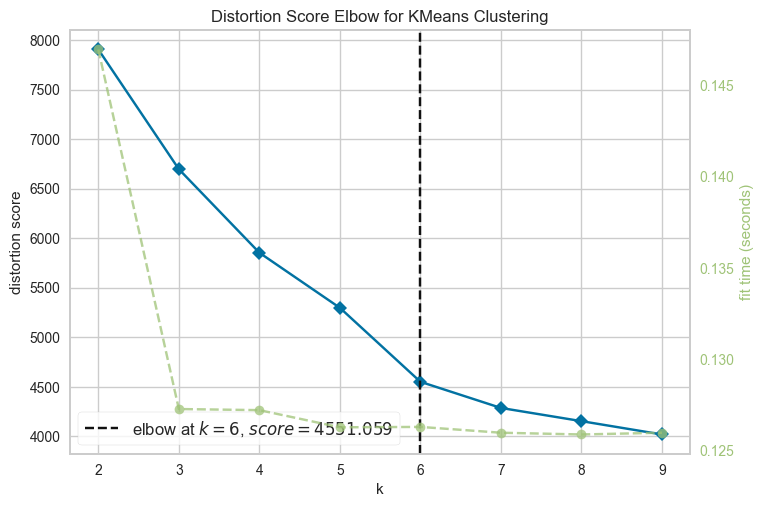

6

In [12]:
eda.determine_optimal_clusters(df_transformed, k_range=(2, 10), model_params=model_params)

In [13]:
pipelines = {
    "KMeans": Pipeline(
        [
            ("cluster", KMeans()),
        ]
    ),
}

In [14]:
param_grids = {
    "KMeans": {
        "cluster__n_clusters": [2,6],
        "cluster__random_state": [40],
    },
}

In [15]:
model_pipeline = ModelPipeline()
model_pipeline.train(df_transformed, pipelines, param_grids, scoring="silhouette_score")

/home/nord/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nord/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/nord/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nord/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
            

In [16]:
model_pipeline.display_results(df_transformed, help_text=True)

Evaluation Metrics for Best Models:


,Model,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,KMeans,0.246164,1.685777,311.341984



Best Parameters for Each Model:


,Model,cluster__n_clusters,cluster__random_state
0,KMeans,2,40



Metric Explanations:
Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters.
  - Range: [-1, 1], higher is better.
  - Higher values indicate better-defined clusters.
Davies-Bouldin Index: Measures the average similarity ratio of each cluster with its most similar cluster.
  - Range: [0, ∞), lower is better.
  - Lower values indicate better clustering.
Calinski-Harabasz Index: Ratio of the sum of between-cluster dispersion to within-cluster dispersion.
  - Range: [0, ∞), higher is better.
  - Higher values indicate better-defined clusters.


In [17]:
cluster_report = model_pipeline.generate_cluster_report(df, df_transformed)


display(cluster_report)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,Count
Cluster,,,,,,,,,,
0,251.4,26.0,100.5,170.2,9.5,959.2,780.70,28.0,37.915,634
1,301.0,0.0,0.0,192.0,0.0,973.4,763.65,28.0,29.310,396


## Conclusions

### Cluster 0
- **Composition**: 
  - High cement content: 301.0 units.
  - Contains no BlastFurnaceSlag and FlyAsh.
  - High water content: 192.0 units.
  - Contains no Superplasticizer.
  - High CoarseAggregate and FineAggregate content: 973.4 and 763.65 units, respectively.
  - Average age: 28.0 days.
- **Strength**: Average compressive strength: 29.310 units.
- **Size**: This cluster includes 396 objects.

### Cluster 1
- **Composition**: 
  - High cement content: 251.4 units.
  - Contains some BlastFurnaceSlag: 26.0 units.
  - High FlyAsh content: 100.5 units.
  - Moderate water content: 170.2 units.
  - Contains Superplasticizer: 9.5 units.
  - High CoarseAggregate and FineAggregate content: 959.2 and 780.70 units, respectively.
  - Average age: 28.0 days.
- **Strength**: Average compressive strength: 37.915 units.
- **Size**: This cluster includes 634 objects.

### Conclusions

1. **Composition and Strength**:
   - Cluster 0 has higher cement and water content but does not contain additives like BlastFurnaceSlag and FlyAsh, resulting in lower compressive strength.
   - Cluster 1 has a more diverse composition, including BlastFurnaceSlag, FlyAsh, and Superplasticizer, which improves compressive strength despite lower cement and water content.

2. **Cluster Sizes**:
   - Cluster 1 is larger, with a higher number of objects (634) compared to Cluster 0 (396).

3. **Application of Clusters**:
   - Cluster 0 can be used for mixtures focused on cost savings by excluding expensive additives, with acceptable strength for less critical structures.
   - Cluster 1 can be used for mixtures with high strength, suitable for more demanding structures where maximum durability and reliability are required.